# AM 201 Final Project

In this notebook, we set up a recurrent neural network:

$\dot{h}_i = - h_i + \sum_{j \neq i} J_{ij}\phi(h_j)$

Here, $\phi$ is a nonlinear activation function, typically chosen to be $tanh$

In [ ]:
! nvidia-smi

Mon Dec 13 20:44:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

$$J_{ij}\sim \mathcal{N}(0,J^2/N)$$

In [ ]:
! pip install cupy

     |████████████████████████████████| 1.7 MB 4.0 MB/s 
  Created wheel for cupy: filename=cupy-10.0.0-cp37-cp37m-linux_x86_64.whl size=95176805 sha256=1ebd8b35ead46b3d607651269eeccfb98253ba4b0bd44defb02be125ad8a9e6c
  Stored in directory: /root/.cache/pip/wheels/67/44/70/78a82ee1a02ce156d6972b2dd3e802218777d83ebdcb8d5e66
Successfully built cupy


In [ ]:
import os
import sys
import time
import numpy as np
import cupy as cp
import matplotlib as mpl
from matplotlib import pyplot as plt
import cmath
from sympy import *
from sympy.abc import *
init_printing(use_latex=True)

from scipy.optimize import brentq
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy import integrate

0.00018358230590820312


In [ ]:
#J is the connectivity matrix
#h is the vector of neural activations
def deriv_func_tanh(t,h,J):
  return -h + np.matmul(J,np.tanh(np.transpose(h)))

def genConnMatrix(N, JScale):
  J = np.random.normal(loc = 0, scale =JScale/np.sqrt(N), size = [N,N])
  for i in range(N):
    J[i,i]=0
  return J

In [ ]:
N = 1000
JScale = 1.5
totTime= 1000
numPts = 5000
J = genConnMatrix(N, JScale)
h_init = np.random.normal(loc=0, scale = 1, size=N)
tempFunc = lambda t, x: deriv_func_tanh(t,x,J)

In [ ]:
start = time.time()

sol = solve_ivp(tempFunc, (0,totTime), h_init, t_eval=np.linspace(0,totTime, numPts))

print(time.time() - start)

2.975574493408203


0.04730057716369629


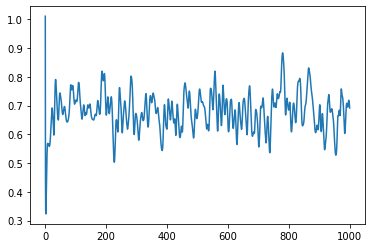

In [ ]:
start = time.time()

# Plot the mean-square average of the neuronal values in the network over time.

fig, ax = plt.subplots()
MSA = np.mean(np.square(sol['y']), axis = 0)
ax.plot(sol['t'],MSA)

print(time.time() - start)

In [ ]:
np.logspace(2,4, 3).tolist()

KeyboardInterrupt: ignored

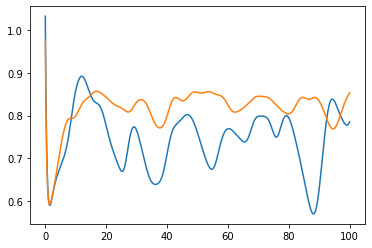

In [ ]:
fig, ax = plt.subplots()
for N in np.logspace(2,4,3).tolist():
  J = genConnMatrix(int(N), JScale)
  h_init = np.random.normal(loc=0, scale = 1, size=int(N))
  tempFunc = lambda t, x: deriv_func_tanh(t,x,J)
  sol = solve_ivp(tempFunc, (0,100), h_init, t_eval=np.linspace(0,100, 1000))
  ax.plot(sol['t'], np.sqrt(np.mean(np.square(sol['y']), axis = 0)), label = int(N))

ax.legend()

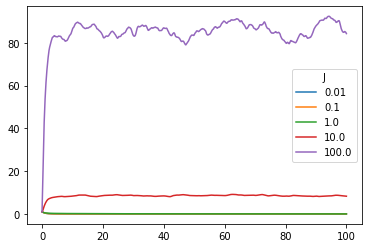

In [ ]:
N=1000
fig, ax = plt.subplots()
for JScale in np.logspace(-2, 2, 5).tolist():
  J = genConnMatrix(int(N), JScale)
  h_init = np.random.normal(loc=0, scale = 1, size=int(N))
  tempFunc = lambda t, x: deriv_func_tanh(t,x,J)
  sol = solve_ivp(tempFunc, (0,100), h_init, t_eval=np.linspace(0,100, 1000))
  ax.plot(sol['t'], np.sqrt(np.mean(np.square(sol['y']), axis = 0)), label = JScale)

ax.legend(title = 'J')

# TO DO
- Implement $V(\Delta)$ function in order to reproduce Figure 1
- Vary size of the network
- Vary gain parameter gJ
- Alternative nonlinearity to tanh
- Modify assumption of zero average so that we have a preferred type of synaptic connection
- Track the distance between intial conditions over time
- Short range synaptic matrices (